# ▶ Análisis Exploratorio de Datos (EDA)

El EDA es esencial para comprender los patrones y las relaciones entre las variables antes de construir el modelo de predicción.



## ▶ 1. Descripción General de los Datos

In [ ]:
'''
Visión General

El número de registros de la Base de Datos de Desarrolladores es de:

    Antes de limpiar la Base de Datos original tenía:      7,421 registros de empleados.

    Después del Proceso de Limpieza de Datos, se tienen:   2,601 registros de empleados.
'''

###  Descripción de los campos:



---

1. **Edad**:   Este campo representa la edad del empleado en años. Permite analizar la relación entre la edad y la probabilidad de rotación, ya que algunas personas pueden tener más o menos propensión a cambiar de trabajo.

2. **Género**:   Indica el género del empleado. Es relevante para estudiar posibles diferencias de rotación entre géneros, ya sea por causas culturales, organizacionales o sociológicas.

3. **Nivel Educativo**:   Este campo refleja el nivel educativo alcanzado por el empleado. Los niveles educativos comunes podrían incluir secundaria, licenciatura, maestría, entre otros. Se utiliza para analizar si los empleados con mayor nivel educativo tienden a permanecer más tiempo en sus empleos o si buscan mejores oportunidades laborales.

4. **Título del Trabajo**:   Muestra el cargo o puesto específico que ocupa el empleado dentro de la organización, como "Desarrollador Senior", "Ingeniero de Software", "Analista de Datos", etc. Este campo es crucial para identificar qué roles tienen mayor o menor rotación, lo que puede ayudar a ajustar estrategias de retención para esos puestos.

5. **Años de Experiencia**:   Indica la cantidad de años de experiencia laboral que tiene el empleado en su campo, que puede incluir tanto experiencia previa en la industria tecnológica como en otros sectores. Este dato ayuda a identificar si los empleados con mayor experiencia tienden a rotar menos o más frecuentemente.

6. **Salario**:   Refleja el salario anual del empleado en la organización. Es un dato clave para explorar la relación entre el salario y la rotación, ya que los empleados mal remunerados o aquellos que perciben salarios por debajo del mercado pueden tener una mayor tendencia a buscar nuevos empleos.

---



###  Cargar DataFrame

In [ ]:
#Cargar DataFrame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Carga el archivo CSV de la Base de Datos limpia en un DataFrame llamado df.
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyectos/ProyectoFS/Base__FS__limpia_MPAC.csv')
#df
df.head(5)

,Edad,Genero,Nivel_Educativo,Titulo_Del_Trabajo,Años_De_Experiencia,Salario
0,32,Hombre,Licenciatura,Ingeniero de Software,5,90000.0
1,28,Mujer,Maestria,Analista de Datos,3,65000.0
2,45,Hombre,Doctorado,Gerente Senior,15,150000.0
3,36,Mujer,Otro,Otro,7,60000.0
4,52,Hombre,Maestria,Director,20,200000.0


###  Resumen Estadístico

In [ ]:
# Usar df.describe() para obtener estadísticas descriptivas de las columnas numéricas.

df.describe()

,Edad,Años_De_Experiencia,Salario
count,2601.000000,2601.000000,2601.000000
mean,34.613226,7.715110,113804.154171
std,8.028433,6.929977,52175.713661
min,21.000000,0.000000,350.000000
25%,28.000000,2.000000,68611.000000
50%,33.000000,6.000000,113563.000000
75%,40.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
# Disminuyendo el número de decimales
df.describe().style.format(precision=2)

# De aquí podemos ver por ejemplo que:
# El 25% de los datos son Hombres de 28 años
# El 50% de los datos son Hombres de 33 años
# El 75% de los datos son Mujeres de 40 años
# La Edad mínima es de 21 años
# La Edad máxima es de 62 años

,Edad,Años_De_Experiencia,Salario
count,2601.00,2601.00,2601.00
mean,34.61,7.72,113804.15
std,8.03,6.93,52175.71
min,21.00,0.00,350.00
25%,28.00,2.00,68611.00
50%,33.00,6.00,113563.00
75%,40.00,12.00,160000.00
max,62.00,34.00,250000.00


## ▶ 2. Visualización y Distribución de Variables Individuales

###  Variables Numéricas

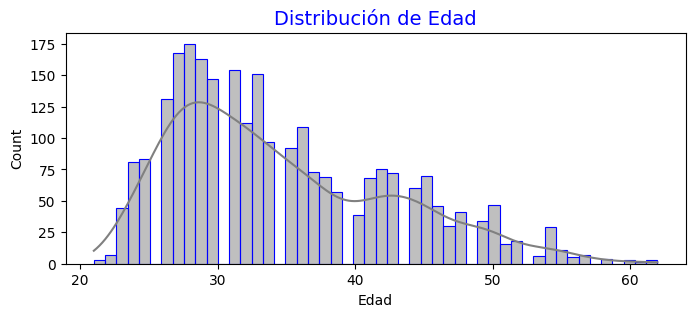

In [ ]:
# Histograma de la Edad
plt.figure(figsize=(8, 3))  # Define el tamaño del gráfico
sns.histplot(df['Edad'], kde=True, bins=50, color='grey', edgecolor='blue')
plt.title("Distribución de Edad", fontsize=14, color='blue')
plt.show()


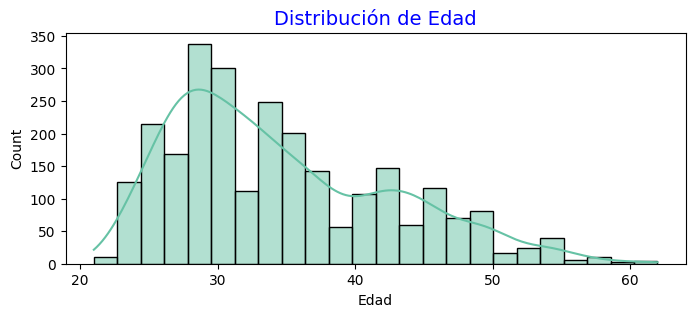

In [ ]:
# Histograma de la Edad
plt.figure(figsize=(8, 3))  # Define el tamaño del gráfico
sns.histplot(df['Edad'], kde=True)
plt.title("Distribución de Edad", fontsize=14, color='blue')
plt.show()


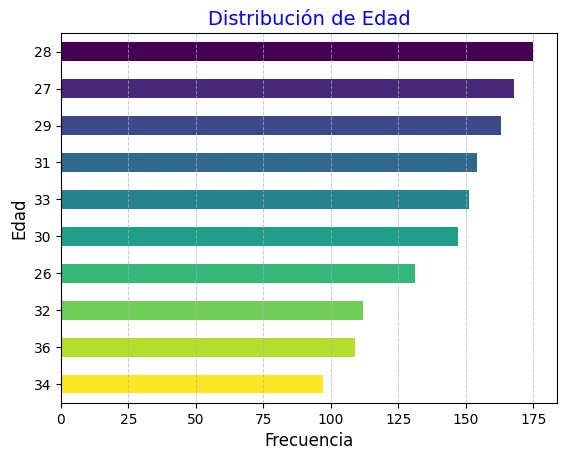

In [ ]:

# Gráfico de barras para Edad
g_edad = df['Edad'].value_counts().nlargest(10)

# Definir una lista de colores para las barras
colors = plt.cm.viridis(np.linspace(0, 1, len(g_edad)))

# Crear el gráfico de barras horizontal con colores múltiples
g_edad.plot(kind='barh', color=colors)

# Personalización del gráfico
plt.title('Distribución de Edad', fontsize=14, color='blue')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# Añadir rejilla
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


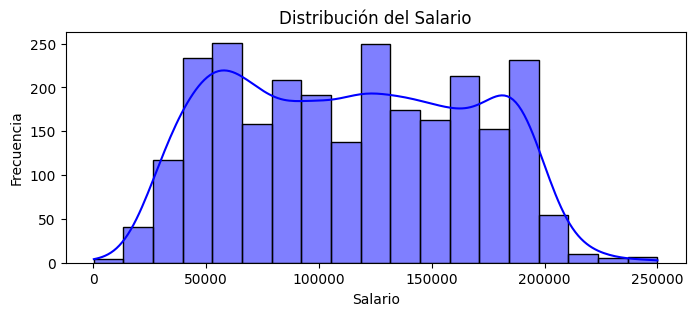

In [ ]:
# Histograma para la variable 'salario'
plt.figure(figsize=(8,3))
sns.histplot(df['Salario'], kde=True, color='blue')
plt.title('Distribución del Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()


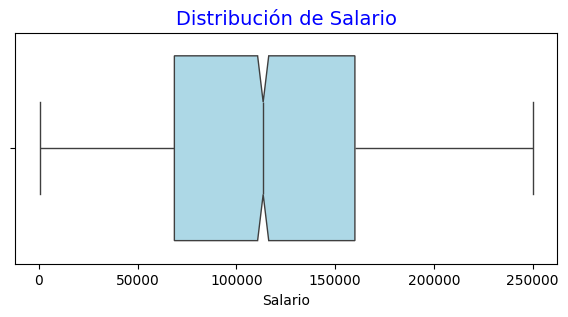

In [ ]:
# Boxplot del Salario
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Salario'], patch_artist=True, notch=True,
              boxprops=dict(facecolor='lightblue'#, color='gray'
              ), vert=False)
plt.title("Distribución de Salario", fontsize=14, color='blue')
plt.show()


In [ ]:
# Contar cuantos valores hay de cada valor único de la columna [6]
df['Salario'].value_counts()


,count
Salario,
120000.0,106
140000.0,95
160000.0,85
55000.0,85
50000.0,79
...,...
185462.0,1
146351.0,1
171036.0,1


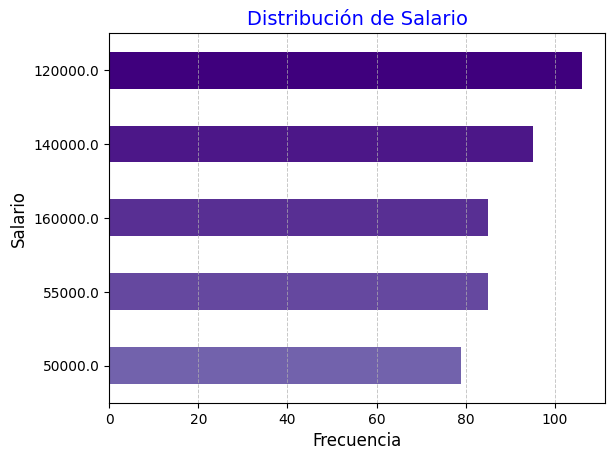

In [ ]:

# Gráfico de barras para Salario
sueldo = df['Salario'].value_counts().nlargest(5)

# Definir una lista de colores para las barras
colors = plt.cm.Purples(np.linspace(1, 0.7, len(sueldo)))

# Crear el gráfico de barras horizontal con colores múltiples
sueldo.plot(kind='barh', color=colors)

# Personalización del gráfico
#plt.figure(figsize=(7,3))
plt.title('Distribución de Salario', fontsize=14, color='blue')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Salario', fontsize=12)

# Añadir rejilla
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


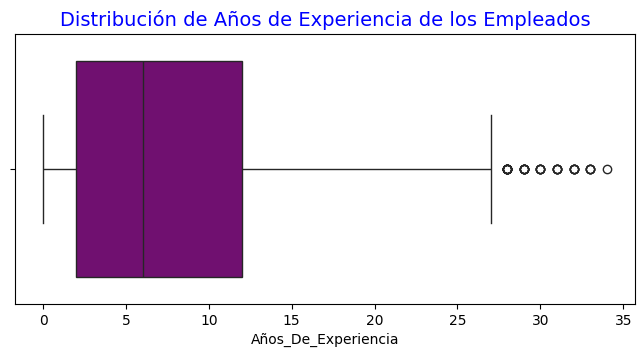

In [ ]:
# Boxplot de Años_De_Experiencia
plt.figure(figsize=(8, 3.5))
sns.boxplot(x=df['Años_De_Experiencia'], color='purple')
plt.title('Distribución de Años de Experiencia de los Empleados', fontsize=14, color='blue')
plt.xlabel('Años_De_Experiencia')
plt.show()


In [ ]:
# Visualizar valores únicos de la columna [5]
df['Años_De_Experiencia'].unique()


array([ 5,  3, 15,  7, 20, 12,  4,  1, 10,  0,  6, 14,  2, 19, 13, 11, 25,
       18,  8, 16,  9, 23, 21, 22, 24, 17, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

In [ ]:
# Contar cuantos valores hay de cada valor único de la columna [5]
df['Años_De_Experiencia'].value_counts()


,count
Años_De_Experiencia,
0,374
3,183
1,182
2,181
4,169
6,137
8,137
5,135
7,114


###  Variables Categóricas

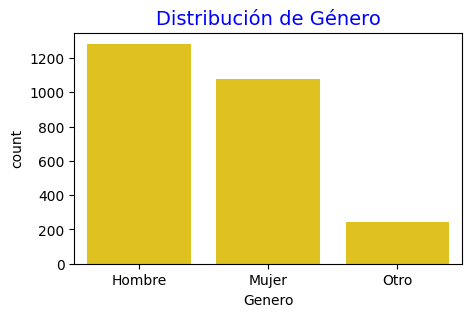

In [ ]:
# Gráfico de barras para Género
plt.figure(figsize=(5, 3))
sns.countplot(x='Genero', data=df, color='gold')
plt.title("Distribución de Género", fontsize=14, color='blue')
plt.show()


<ipython-input-219-ef615890406e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genero', data=df, palette='Set2')


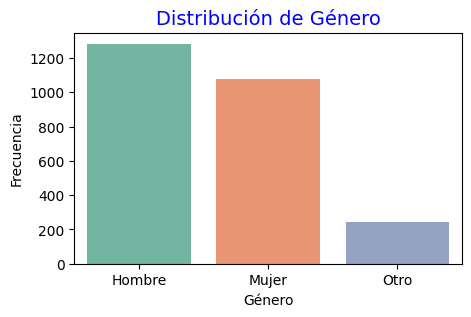

In [ ]:

# Gráfico de barras para la variable 'Genero'
plt.figure(figsize=(5, 3))
sns.countplot(x='Genero', data=df, palette='Set2')
plt.title("Distribución de Género", fontsize=14, color='blue')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


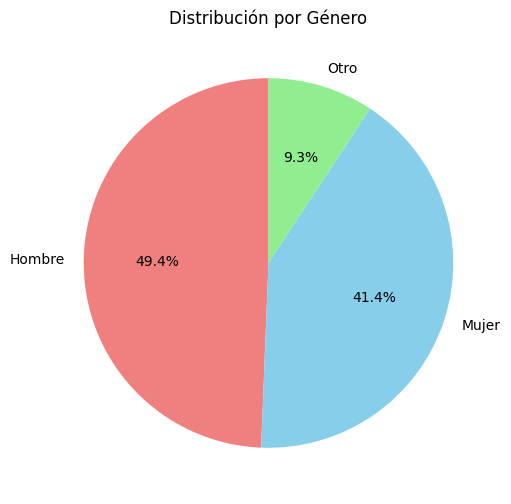

In [ ]:
# Contar la cantidad de clientes por país
gen_counts = df['Genero'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Distribución por Género')
plt.show()


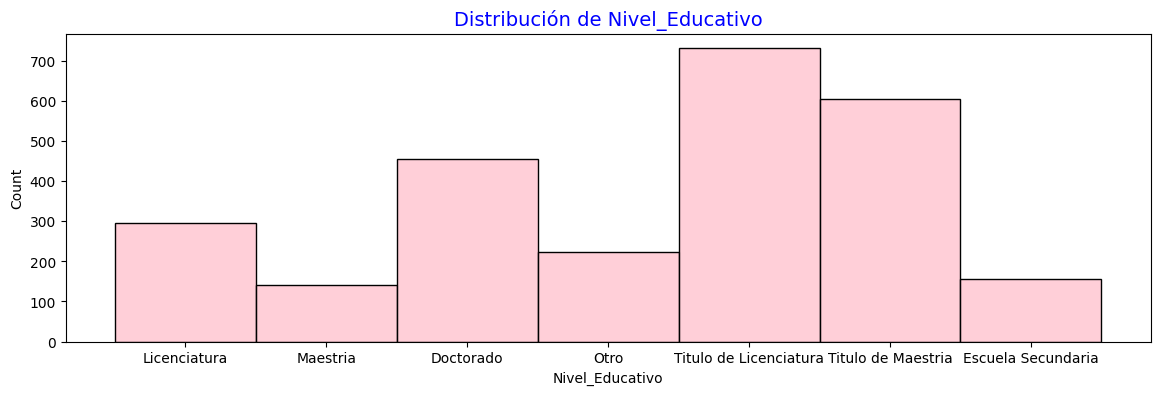

In [ ]:
# Gráfico de barras para Nivel_Educativo
plt.figure(figsize=(14, 4))
sns.histplot(x='Nivel_Educativo', data=df, color='pink')
plt.title("Distribución de Nivel_Educativo", fontsize=14, color='blue')
plt.show()


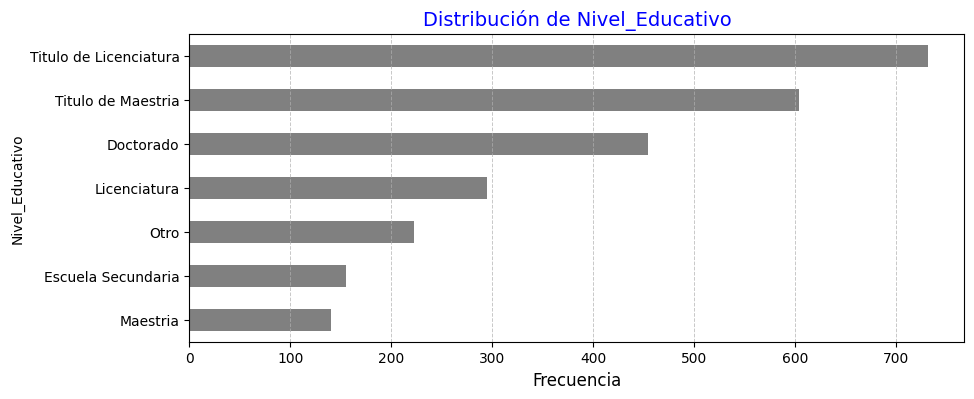

In [ ]:
# Gráfico de barras para Nivel_Educativo
plt.figure(figsize=(10, 4))
df['Nivel_Educativo'].value_counts().nlargest(10).plot(kind='barh', color='gray')

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()

plt.title("Distribución de Nivel_Educativo", fontsize=14, color='blue')
plt.xlabel('Frecuencia', fontsize=12)

# Añadir rejilla
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


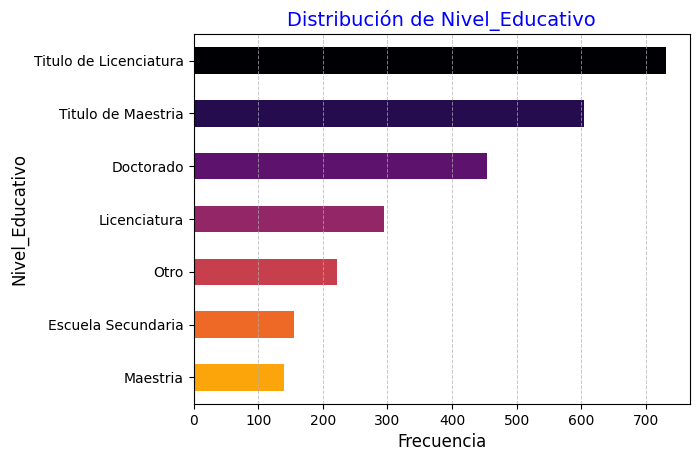

In [ ]:

# Gráfico de barras para Nivel_Educativo
n_edu = df['Nivel_Educativo'].value_counts().nlargest(10)

# Definir una lista de colores para las barras
colors = plt.cm.inferno(np.linspace(0, 0.8, len(n_edu)))

# Crear el gráfico de barras horizontal con colores múltiples
n_edu.plot(kind='barh', color=colors)

# Personalización del gráfico
plt.title('Distribución de Nivel_Educativo', fontsize=14, color='blue')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Nivel_Educativo', fontsize=12)

# Añadir rejilla
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


## ▶ 3. Correlación entre Variables

Además de las hipótesis, es crucial analizar las correlaciones entre las variables numéricas. Para ello, se calcula la matriz de correlación para las variables numéricas y se visualiza mediante un heatmap:

Aquí podemos observar qué variables están más relacionadas entre sí, lo cual puede ser útil para detectar factores que afectan la rotación, como la relación entre salario y años de experiencia.


###  Matriz de Correlación

In [ ]:
# Correlación entre variables numéricas
correlacion = df[['Edad', 'Años_De_Experiencia', 'Salario']].corr()


In [ ]:
# Visualización de la matriz de correlación
plt.figure(figsize=(7, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación', fontsize=14, color='blue')
plt.show()


NameError: name 'correlacion' is not defined

<Figure size 700x500 with 0 Axes>

Aquí podemos observar qué variables están más relacionadas entre sí, lo cual puede ser útil para detectar factores que afectan la rotación, como la relación entre Salario y Años de Experiencia o la relación entre el Salario y la Edad.



## ▶ 4. Análisis de Valores Atípicos

###  Identificación de Valores Atípicos (Outliers)

Detectamos valores atípicos en variables como salario, años de experiencia y edad utilizando boxplots:

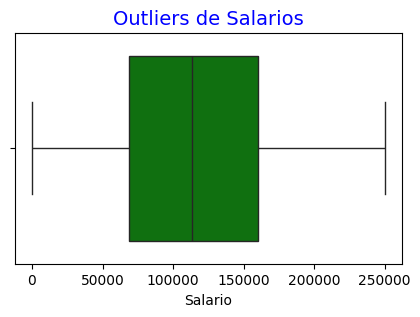

In [ ]:
# Boxplot para detectar outliers en el Salario
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Salario'], color='green')
plt.title('Outliers de Salarios', fontsize=14, color='blue')
plt.show()


Como podemos observar en el boxplot, no se observan outliers en la variable Salario.

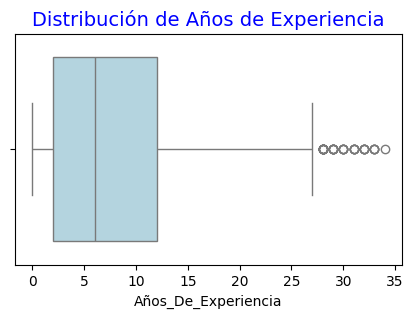

In [ ]:
# Boxplot para detectar outliers en Años_De_Experiencia
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Años_De_Experiencia'], color='lightblue')
plt.title('Outliers de Años de Experiencia', fontsize=14, color='blue')
plt.show()


Los outliers en la variable Años_De_Experiencia representan Desarrolladores con Años_De_Experiencia fuera del rango típico de la empresa, es decir, podrían reflejar Desarrolladores con poca o mucha experiencia. Esto puede influir en el análisis de la rotación de personal, por lo que es importante identificarlos y decidir si deben ser eliminados o tratados. Como podemos observar en este caso hay Desarrolladores con más de 25 Años_De_Experiencia.

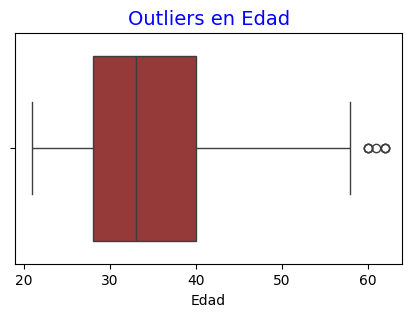

In [ ]:
# Boxplot para detectar outliers en la columna 'Edad'
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Edad'], color='brown')
plt.title('Outliers en Edad', fontsize=14, color='blue')
plt.xlabel('Edad')
plt.show()


Los outliers en la variable edad representan Desarrolladores con edades fuera del rango típico de la empresa, es decir, podrían reflejar Desarrolladores muy jóvenes o mayores. Esto puede influir en el análisis de la rotación de personal, por lo que es importante identificarlos y decidir si deben ser eliminados o tratados. Como podemos observar en este caso hay Desarrolladores mayores de 60 años.


###  Tratamiento de Outliers

Si encontramos outliers extremos, se puede optar por eliminarlos o tratarlos según el contexto del negocio.
</br>
Puedes eliminarlos de la siguiente manera:


In [ ]:
# Eliminación de outliers basados en el rango intercuartil (IQR)
Q1 = df['Años_De_Experiencia'].quantile(0.25)
Q3 = df['Años_De_Experiencia'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['Años_De_Experiencia'] >= (Q1 - 1.5 * IQR)) & (df['Años_De_Experiencia'] <= (Q3 + 1.5 * IQR))]


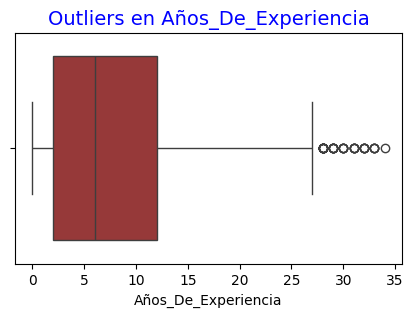

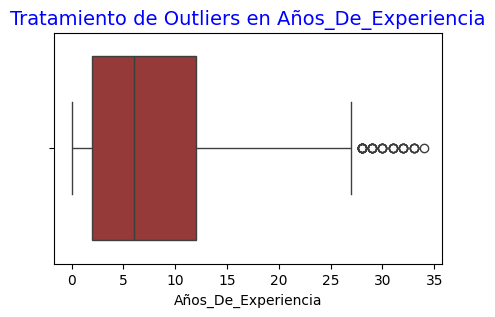

In [ ]:
# Boxplot para detectar outliers en la columna 'Años_De_Experiencia'
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Años_De_Experiencia'], color='brown')
plt.title('Outliers en Años_De_Experiencia', fontsize=14, color='blue')
plt.xlabel('Años_De_Experiencia')
plt.show()

# Boxplot para detectar outliers en la columna 'Años_De_Experiencia'
plt.figure(figsize=(5,3))
sns.boxplot(x=df_clean['Años_De_Experiencia'], color='brown')
plt.title('Tratamiento de Outliers en Años_De_Experiencia', fontsize=14, color='blue')
plt.xlabel('Años_De_Experiencia')
plt.show()


In [ ]:
# Eliminación de outliers basados en el rango intercuartil (IQR)

#Edad
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['Edad'] >= (Q1 - 1.5 * IQR)) & (df['Edad'] <= (Q3 + 1.5 * IQR))]


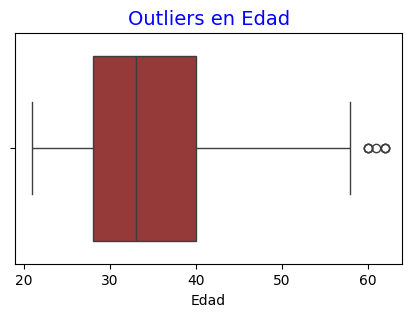

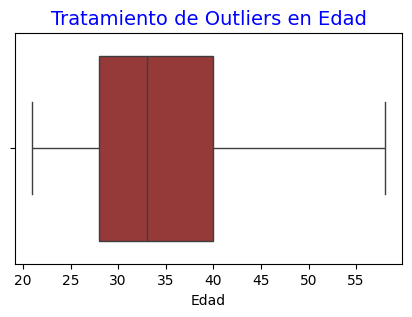

In [ ]:
# Boxplot para detectar outliers en la columna 'Edad'
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Edad'], color='brown')
plt.title('Outliers en Edad', fontsize=14, color='blue')
plt.xlabel('Edad')
plt.show()

# Boxplot para detectar outliers en la columna 'Edad'
plt.figure(figsize=(5,3))
sns.boxplot(x=df_clean['Edad'], color='brown')
plt.title('Tratamiento de Outliers en Edad', fontsize=14, color='blue')
plt.xlabel('Edad')
plt.show()


Como podemos observar en este caso ya NO hay Desarrolladores mayores de 60 años.

## ▶ 5. Análisis de Valores Faltantes

###  Identificación de Valores Faltantes

In [ ]:
df.isnull()

,Edad,Genero,Nivel_Educativo,Titulo_Del_Trabajo,Años_De_Experiencia,Salario
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2596,False,False,False,False,False,False
2597,False,False,False,False,False,False
2598,False,False,False,False,False,False
2599,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Edad,0
Genero,0
Nivel_Educativo,0
Titulo_Del_Trabajo,0
Años_De_Experiencia,0
Salario,0


Para identificar valores faltantes en el dataset, utilizamos un mapa de calor que visualiza la presencia de valores nulos:

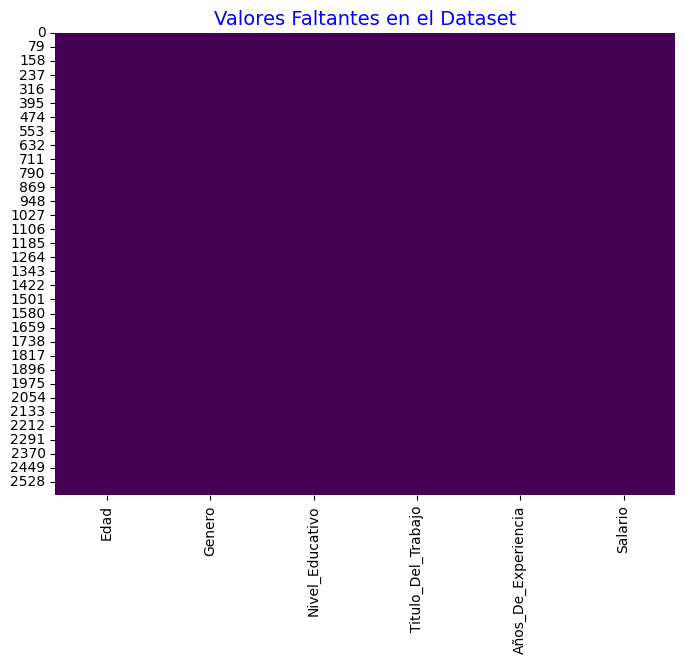

In [ ]:
# Mapa de calor para valores faltantes

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes en el Dataset', fontsize=14, color='blue')
plt.show()


## ▶ 6. Relación entre Variables Categóricas y Numéricas

Para validar la relación entre variables categóricas y numéricas, usamos boxplots, que comparan la distribución de las variables numéricas (por ejemplo, salario) en función de categorías como "género" o "nivel educativo":

### Comparar Salario por Género

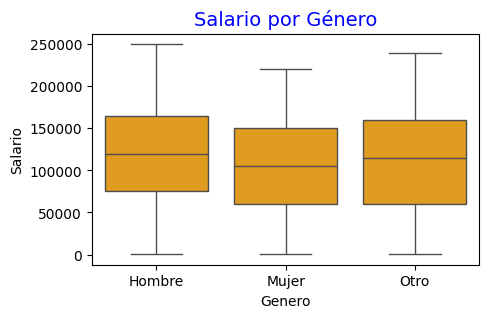

In [ ]:
# Boxplot para comparar Salario por Género
plt.figure(figsize=(5, 3))
sns.boxplot(x='Genero', y='Salario', data=df, color='orange')
plt.title('Salario por Género', fontsize=14, color='blue')
plt.show()


### Comparar Salario por Nivel_Educativo

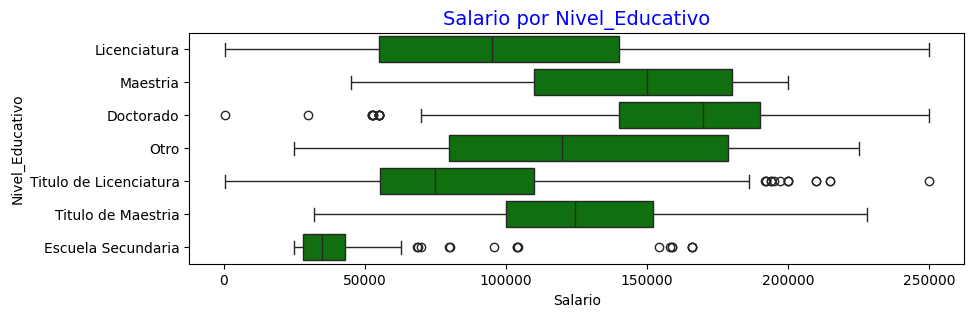

In [ ]:
# Boxplot para comparar Salario por Nivel_Educativo
plt.figure(figsize=(10, 3))
#colors = ['pink', 'lightblue', 'lightgreen']
sns.boxplot(x='Salario', y='Nivel_Educativo', data=df, color='green')
plt.title('Salario por Nivel_Educativo', fontsize=14, color='blue')
plt.show()


## ▶ 7. Observaciones y Hallazgos Importantes

### Análisis de las Hipótesis

Ahora analizamos cada hipótesis planteada en el reporte y las pruebas que vamos a realizar para validar o refutar cada una.

### Hipótesis:

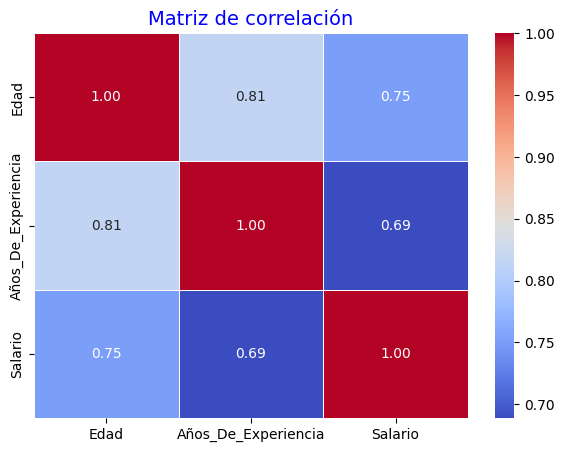

In [ ]:
# Correlación entre variables numéricas
correlacion = df[['Edad', 'Años_De_Experiencia', 'Salario']].corr()
# Visualización de la matriz de correlación
plt.figure(figsize=(7, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación', fontsize=14, color='blue')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Analizamos los empleados con menos de 5 años de experiencia
#df['Experiencia_categoria'] = df['Años de Experiencia'].apply(lambda x: 0 if x < 5 else 1)
#X = df[['Edad', 'Años_De_Experiencia', 'Salario']]
#y = df['Experiencia_categoria']  # Variable

X = df[['Edad', 'Salario']]
y = df['Años_De_Experiencia']  # Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#2. Entrenamiento del Modelo:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2)
model.fit(X_train, y_train)

#3. Evaluación del Modelo:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.14340588988476313
[[112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 51   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 49   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ▶ 	Dashboard

El dashboard presenta gráficos de barras y líneas que muestran las tasas de rotación por diferentes categorías (por ejemplo, por género, experiencia y salario), lo que permite tomar decisiones informadas.

### Género por Edad

In [ ]:
# Dashboard con gráficos interactivos
fig = px.histogram(df, x='Genero', color='Edad', title="Distribución de Género por Edad")
fig.show()


### Salario por Edad

In [ ]:
# Dashboard con gráficos interactivos
fig = px.histogram(df, x='Salario', color='Edad', title="Distribución de Salario por Edad")
fig.show()


### Salarios

In [ ]:
# Gráfico interactivo de la distribución de salarios
fig1 = px.histogram(df, x='Salario', nbins=30, title='Distribución de Salarios de Empleados')
fig1.update_layout(xaxis_title='Salario', yaxis_title='Frecuencia')


In [ ]:
# Gráfico interactivo de la relación entre salario y Años_De_Experiencia
fig2 = px.scatter(df, x='Salario', y='Años_De_Experiencia', #color='rotacion',
                  labels={'Salario': 'Salario', 'Años_De_Experiencia': 'Años_De_Experiencia'},
                  title='Relación entre Salario y Años_De_Experiencia de Desarrolladores')
fig2.update_layout(xaxis_title='Salario', yaxis_title='Años_De_Experiencia')
